<h1> <centering> ECE 653 Final Project: Check Your Perturbations </centering> </h1>
<h3> By Joseph Scott, Laura Graves, and Vineel Nagisetty </h3>

In [1]:
# clone the repo if running on colab
import warnings
warnings.filterwarnings('ignore')

try:
    import google.colab
    !git clone https://github.com/vin-nag/checkYourPerturbations.git
    !pip install func_timeout
    %cd ./checkYourPerturbations/
    inColab = True
except:
    %cd ./../
    inColab = False

/home/vineel/PycharmProjects/cs858/checkYourPerturbations/src


In [2]:
# imports
from src.generator.factory import GeneratorSelector, GeneratorTypes
from src.benchmark import BenchmarkEnums, Benchmark
from src.evaluator import Evaluator

Using TensorFlow backend.


In [3]:
# load the generators
selector = GeneratorSelector()
generators = selector.getAllGenerators()

# view the different generators
for generator in generators:
    print(generator)

DLFuzz
StepFuzz
NormFuzz
LaplaceFuzz
VinFuzz
bim
fgsm


In [4]:
# load and view the benchmark
benchmark = Benchmark(BenchmarkEnums.Demo)
benchmark.data.head(3)

Created benchmark with shape: (4, 4).


,modelName,model,image,label
0,robust,<tensorflow.python.keras.engine.sequential.Seq...,"[[[[-0.5], [-0.5], [-0.5], [-0.5], [-0.5], [-0...",9
1,robust,<tensorflow.python.keras.engine.sequential.Seq...,"[[[[-0.5], [-0.5], [-0.5], [-0.5], [-0.5], [-0...",1
2,robust,<tensorflow.python.keras.engine.sequential.Seq...,"[[[[-0.5], [-0.5], [-0.5], [-0.5], [-0.5], [-0...",3


Starting evaluation for DLFuzz:
	Evaluating model: robust for true label: 9
		Result: new label: 3, time: 9.2141, similarity: 0.5974.
	Evaluating model: robust for true label: 1
		Result: timed out.
	Evaluating model: robust for true label: 3


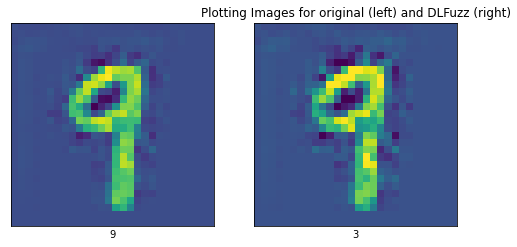

In [ ]:
# perform evaluation
evaluator = Evaluator(benchmark=benchmark, generators=generators)
evaluator.evaluate(timeMax=25)